In [1]:
import numpy as np
import pandas as pd

from models import LogisticRegression
from ml_utils import optim_data, test_plots

C:\Users\Utente\AppData\Local\Temp\ipykernel_2552\2181508460.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Apple quality dataset

In [4]:
# load with constant column
X_train_apple = pd.read_csv("datasets/apple_quality/apple_X_train.csv").values
y_train_apple = pd.read_csv("datasets/apple_quality/apple_y_train.csv").values.reshape(-1)
X_test_apple = pd.read_csv("datasets/apple_quality/apple_X_test.csv").values
y_test_apple = pd.read_csv("datasets/apple_quality/apple_y_test.csv").values.reshape(-1)

In [6]:
print(f"""
Apple quality dataset
X_train = {X_train_apple.shape}
X_test = {X_test_apple.shape}""")


Apple quality dataset
X_train = (3032, 8)
X_test = (758, 8)


In [7]:
w0 = (2 + 2) * np.random.default_rng(42).random(8) - 2

## SGD

### SGD-Fixed

In [30]:
sgd_fixed_1 = LogisticRegression(solver="SGD-Fixed", C=0.1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgd_fixed_2 = LogisticRegression(solver="SGD-Fixed", C=0.1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgd_fixed_3 = LogisticRegression(solver="SGD-Fixed", C=0.1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.05)

models1_data1 = optim_data([sgd_fixed_1, sgd_fixed_2, sgd_fixed_3])

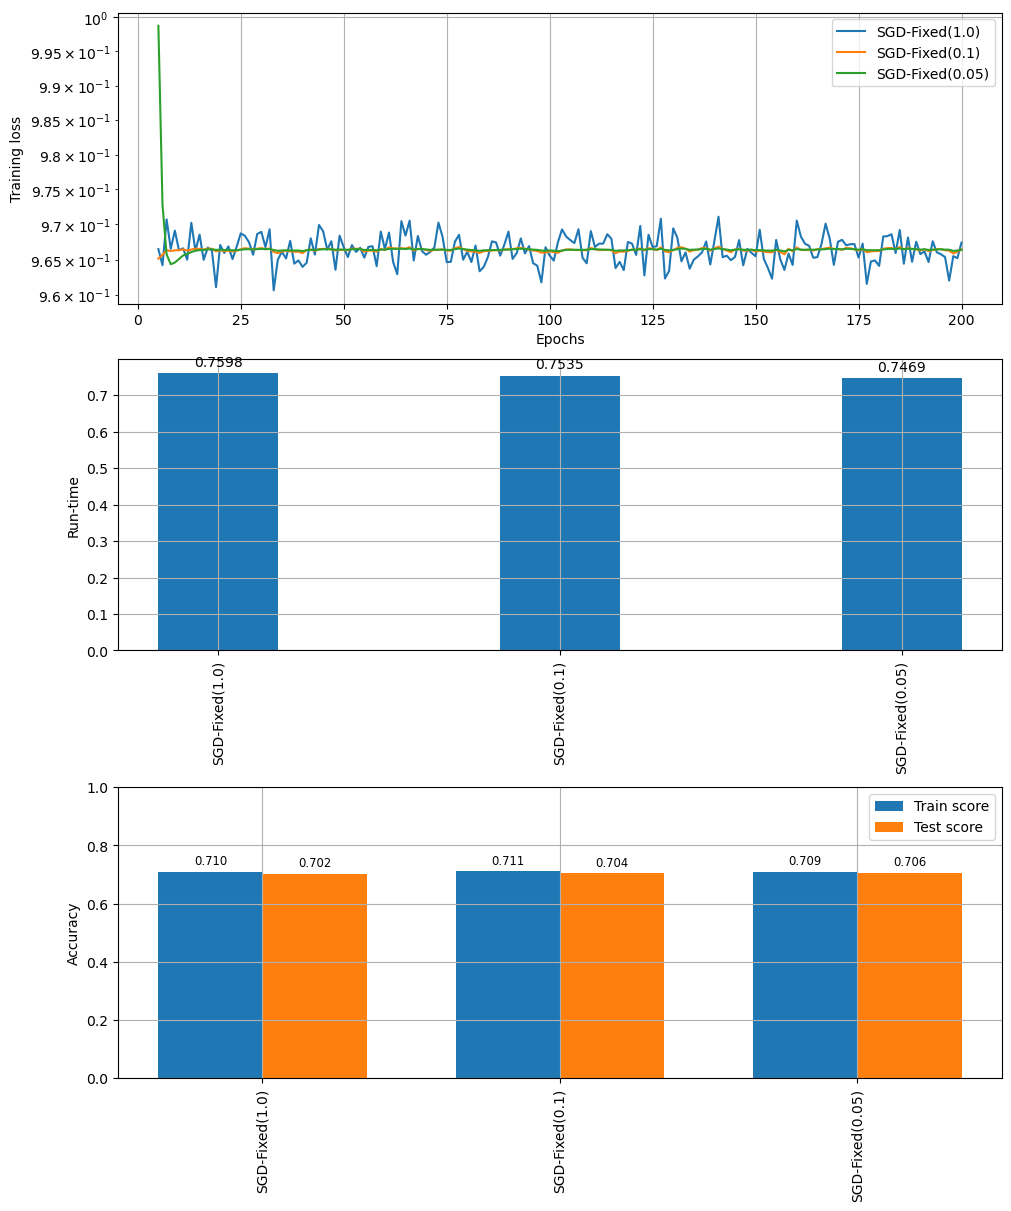

In [31]:
test_plots(models1_data1)

### SGD-Decreasing

In [32]:
sgd_decre_1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgd_decre_2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgd_decre_3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.05)

models2_data1 = optim_data([sgd_decre_1, sgd_decre_2, sgd_decre_3])

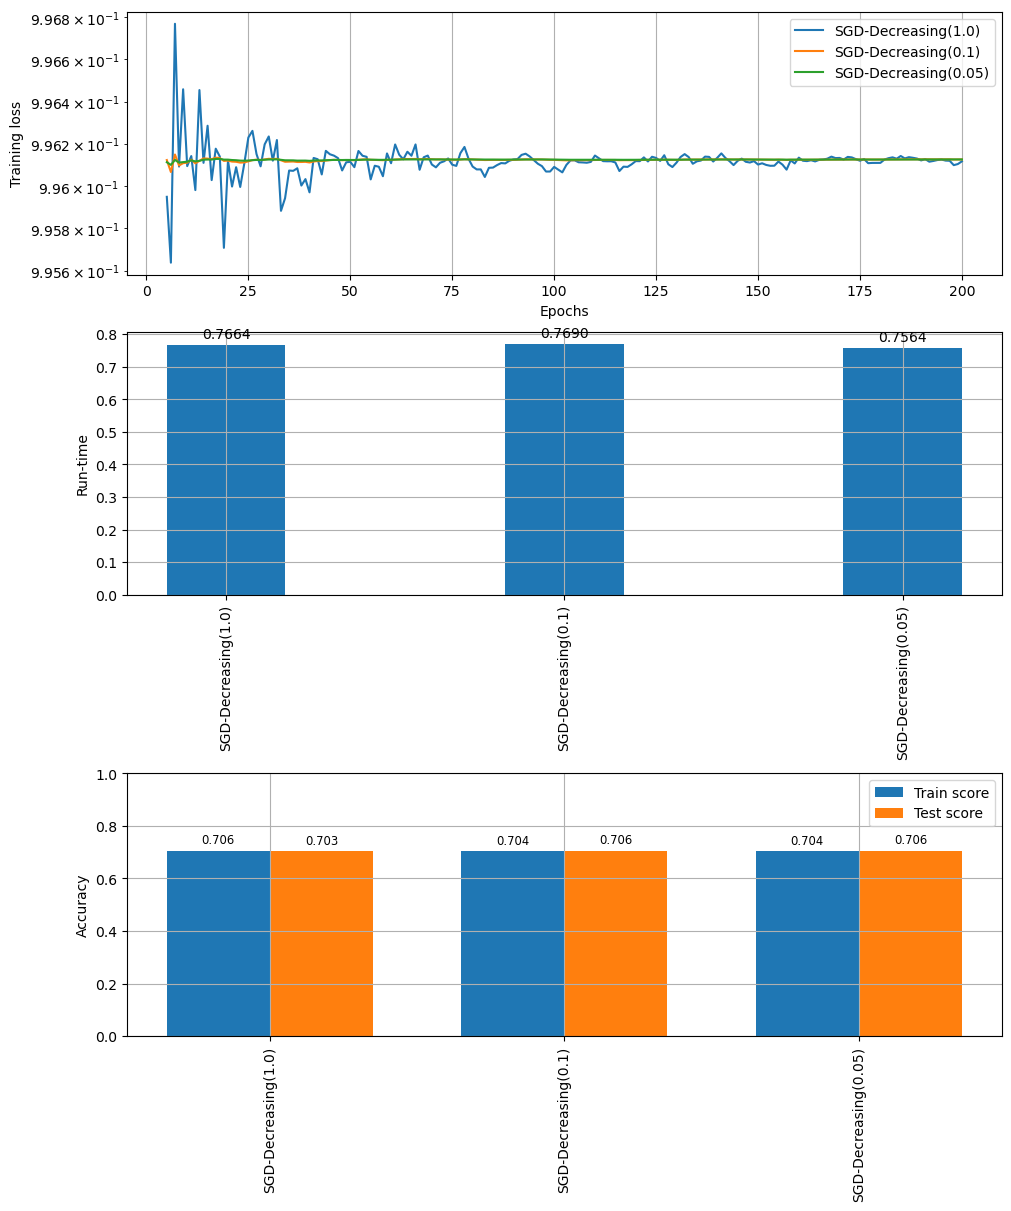

In [33]:
test_plots(models2_data1)

### SGD-Armijo

In [39]:
sgd_armijo_1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgd_armijo_2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgd_armijo_3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)
# regolarizzazione massima, altrimenti ci impiega troppo per l'esecuzione

models3_data1 = optim_data([sgd_armijo_1, sgd_armijo_2, sgd_armijo_3])

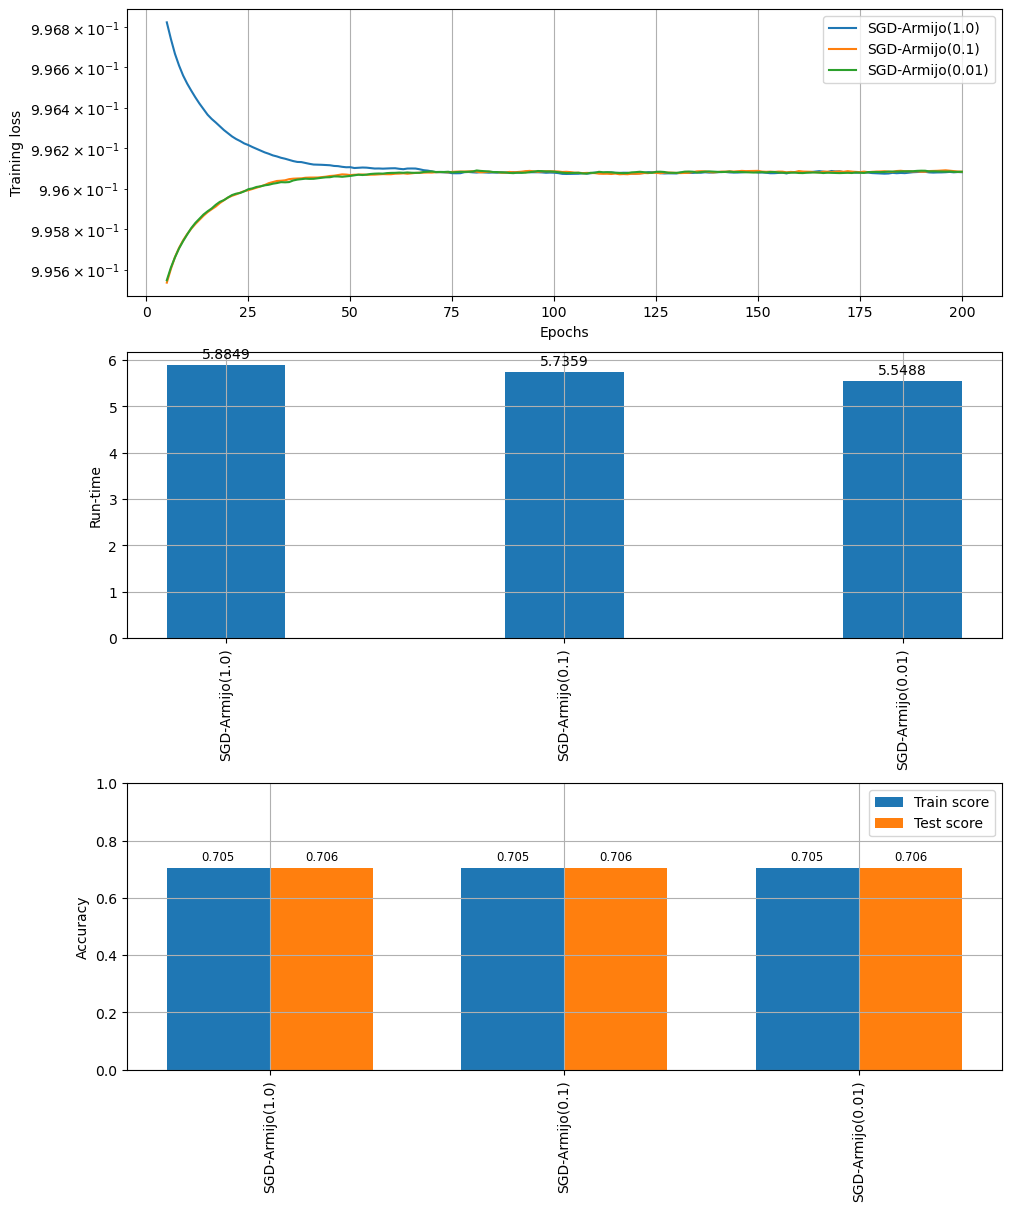

In [40]:
test_plots(models3_data1)

## SGDM

### SGDM

In [41]:
sgdm_1 = LogisticRegression(solver="SGDM", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
sgdm_2 = LogisticRegression(solver="SGDM", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
sgdm_3 = LogisticRegression(solver="SGDM", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.05, momentum=0.9)

models4_data1 = optim_data([sgdm_1, sgdm_2, sgdm_3])

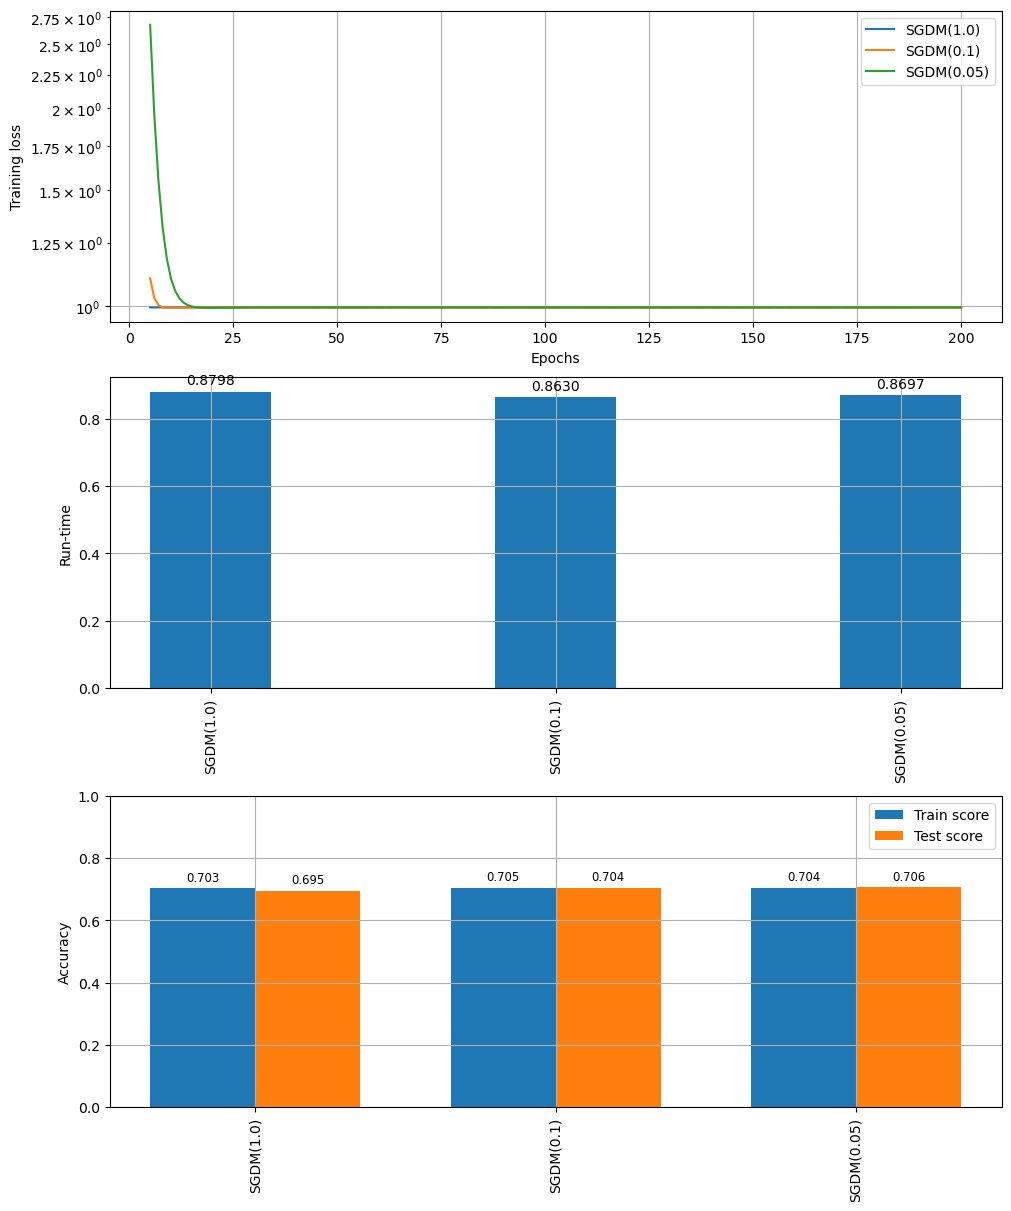

In [49]:
test_plots(models4_data1)

### MSL-SGDM-C

In [43]:
mslc_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslc_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
mslc_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

models5_data1 = optim_data([mslc_1, mslc_2, mslc_3])

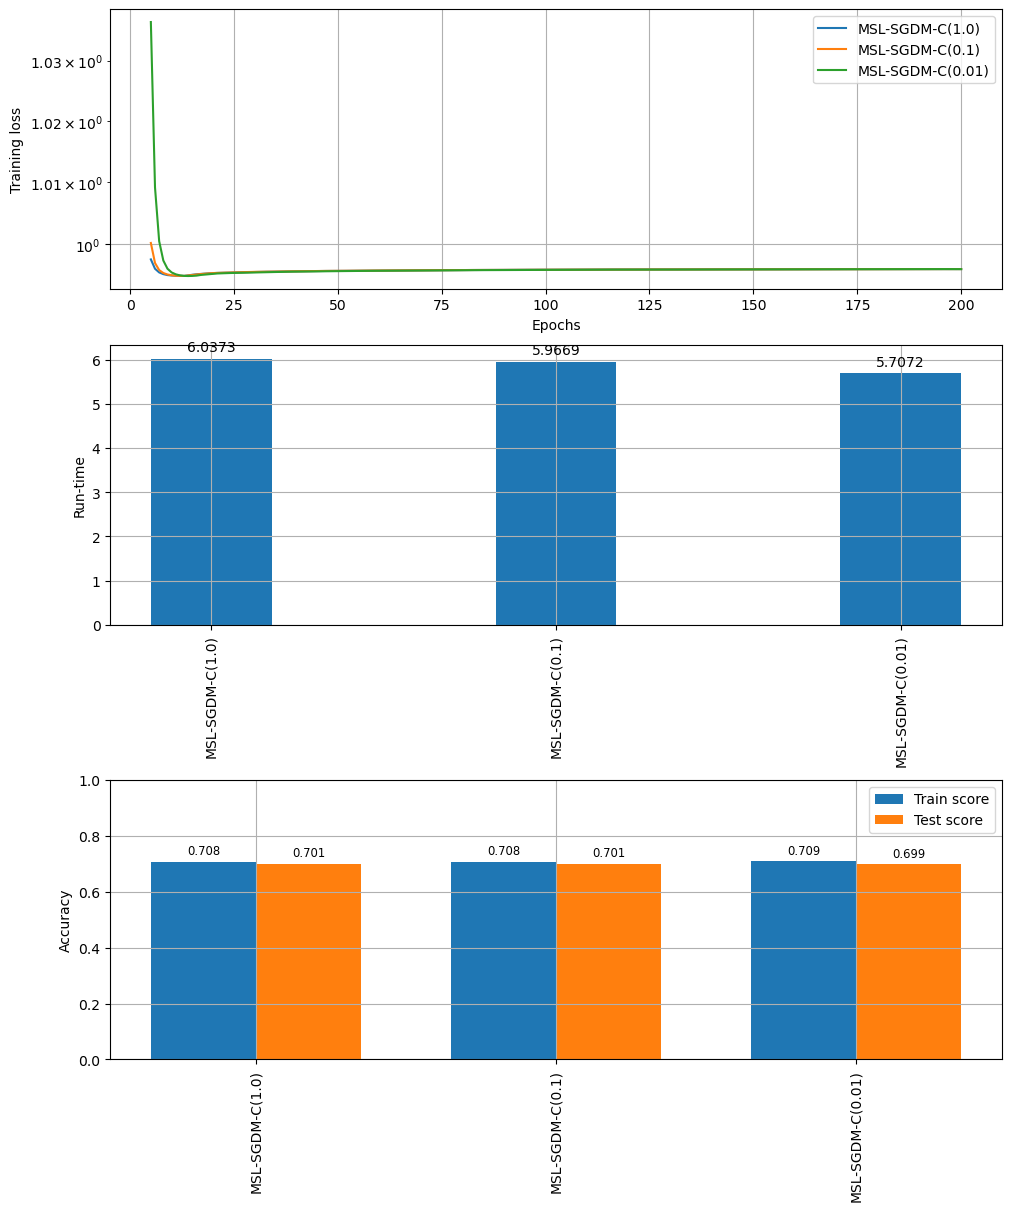

In [44]:
test_plots(models5_data1)

### MSL-SGDM-R

In [46]:
mslr_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslr_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
mslr_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32, epochs=200).fit(w0, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

models6_data1 = optim_data([mslr_1, mslr_2, mslr_3])

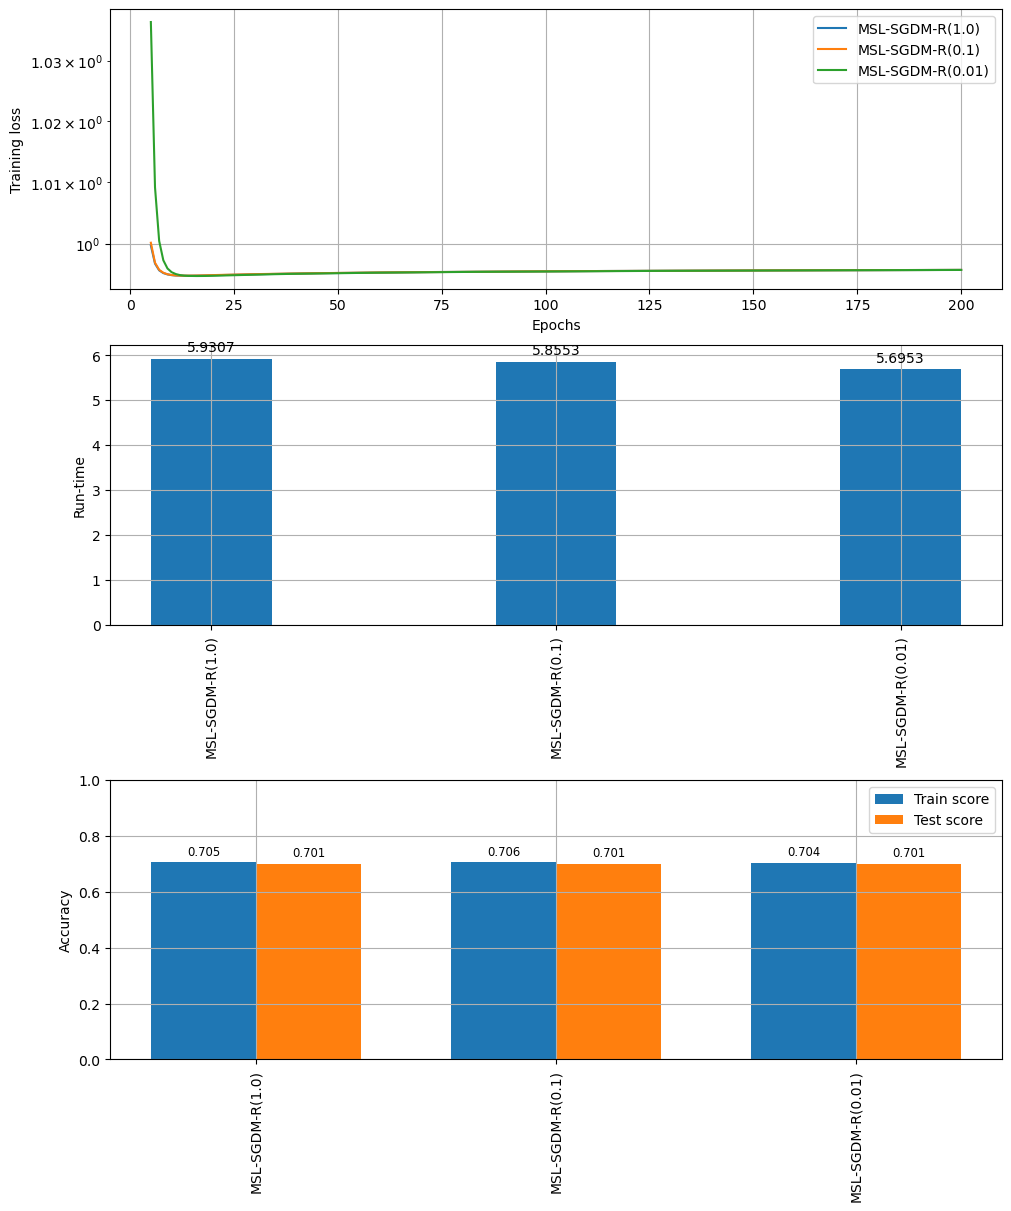

In [47]:
test_plots(models6_data1)

## Summary

In [51]:
pd.concat([models1_data1, models2_data1, models3_data1, models4_data1, models5_data1, models6_data1]).drop(columns={"Solution", "Loss/Epochs", "labels"})

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,32,1.00,0.0,0.967400,0.221052,0.759850,200,0.710092,0.701847
1,SGD-Fixed,32,0.10,0.0,0.966425,0.219615,0.753458,200,0.710752,0.704485
2,SGD-Fixed,32,0.05,0.0,0.966378,0.219530,0.746896,200,0.709103,0.705805
0,SGD-Decreasing,32,1.00,0.0,0.996117,0.236224,0.766383,200,0.705805,0.703166
1,SGD-Decreasing,32,0.10,0.0,0.996126,0.236268,0.768965,200,0.703826,0.705805
2,SGD-Decreasing,32,0.05,0.0,0.996126,0.236269,0.756449,200,0.704156,0.705805
0,SGD-Armijo,32,1.00,0.0,0.996082,0.236054,5.884911,200,0.704815,0.705805
1,SGD-Armijo,32,0.10,0.0,0.996084,0.236064,5.735927,200,0.704815,0.705805
2,SGD-Armijo,32,0.01,0.0,0.996084,0.236065,5.548785,200,0.704815,0.705805
0,SGDM,32,1.00,0.9,0.996189,0.236575,0.879834,200,0.702836,0.695251


# Cars purchaising dataset

In [2]:
# load with constant column
X_train_car = pd.read_csv("datasets/cars/car_X_train.csv").values
y_train_car = pd.read_csv("datasets/cars/car_y_train.csv").values.reshape(-1)
X_test_car = pd.read_csv("datasets/cars/car_X_test.csv").values
y_test_car = pd.read_csv("datasets/cars/car_y_test.csv").values.reshape(-1)

In [3]:
print(f"""
Car purchaising dataset
X_train = {X_train_car.shape}, y_train = {y_train_car.shape}
X_test = {X_test_car.shape}, y_test = {y_test_car.shape}""")


Car purchaising dataset
X_train = (754, 4), y_train = (754,)
X_test = (189, 4), y_test = (189,)


In [4]:
w0 = (2 + 2) * np.random.default_rng(42).random(4) - 2

## SGD

### SGD-Fixed/Decreasing

In [5]:
sgdCar_fixed_1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_fixed_2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_fixed_3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.05)

sgdCar_decre_1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_decre_2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_decre_3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

modelsCar_data1 = optim_data([sgdCar_fixed_1, sgdCar_fixed_2, sgdCar_fixed_3, sgdCar_decre_1, sgdCar_decre_2, sgdCar_decre_3])
#modelsCar_data2 = optim_data([])

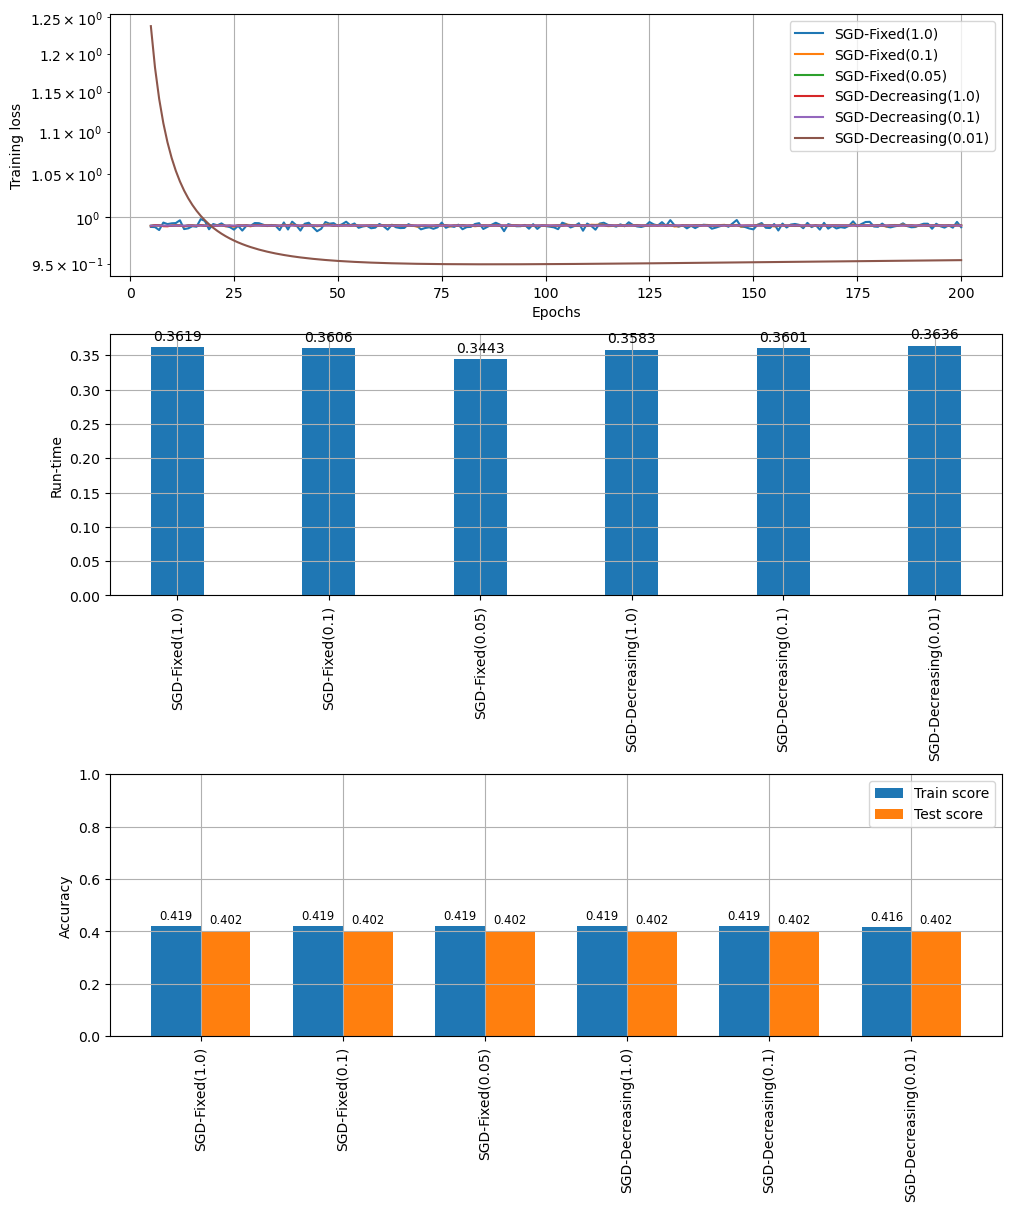

In [6]:
test_plots(modelsCar_data1)

### SGD-Armijo

In [7]:
sgdCar_armijo_1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_armijo_2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_armijo_3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

modelsCar_data3 = optim_data([sgdCar_armijo_1, sgdCar_armijo_2, sgdCar_armijo_3])

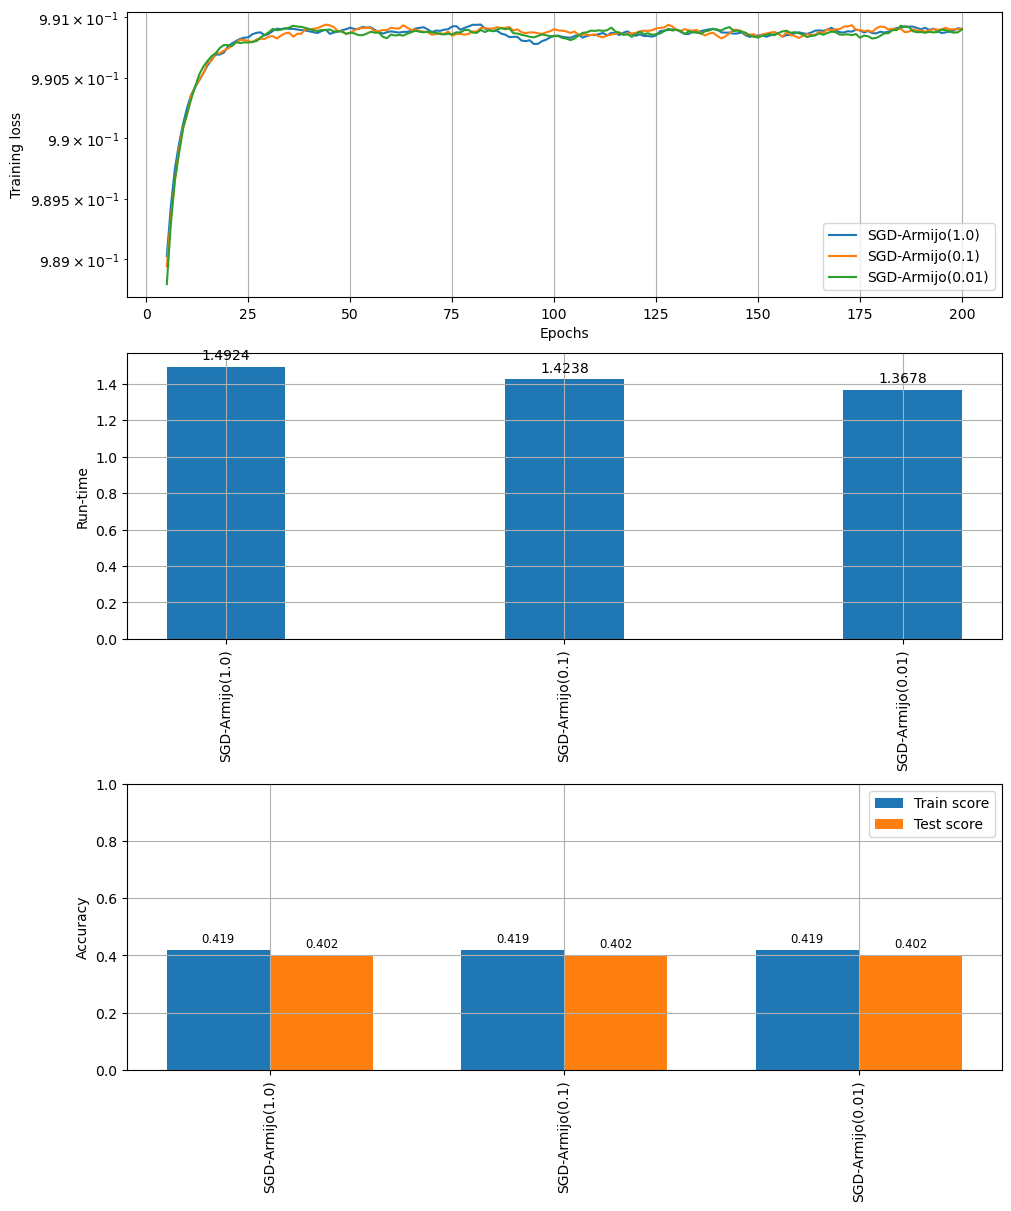

In [8]:
test_plots(modelsCar_data3)

## SGDM

### SGDM

In [9]:
sgdmCar_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
sgdmCar_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
sgdmCar_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

modelsCar_data4 = optim_data([sgdmCar_1, sgdmCar_2, sgdmCar_3])

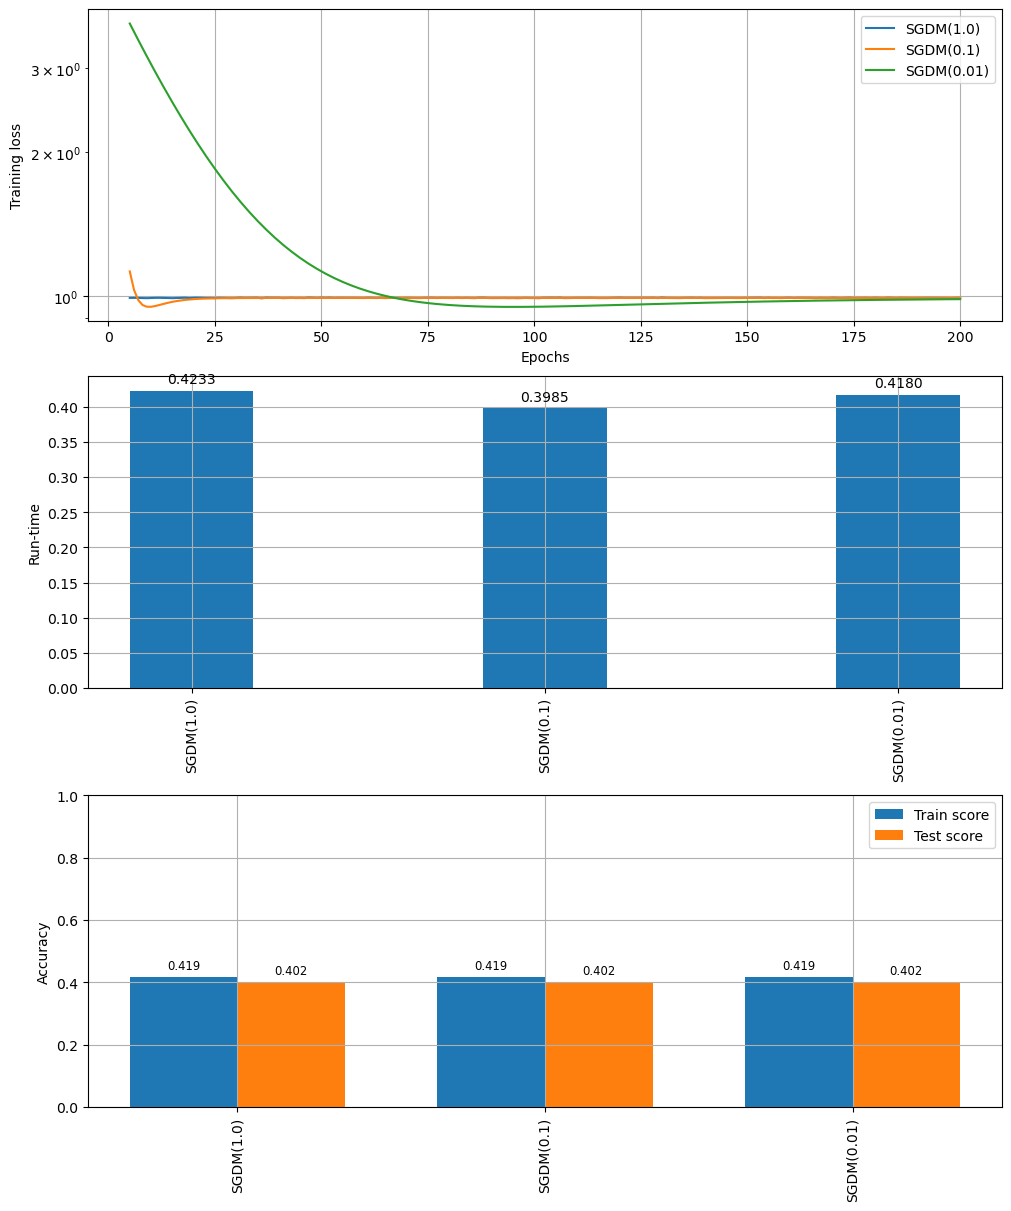

In [10]:
test_plots(modelsCar_data4)

### MSL-SGDM-C/R

In [11]:
mslcCar_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslcCar_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
mslcCar_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

mslrCar_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslrCar_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
mslrCar_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

modelsCar_data5 = optim_data([mslcCar_1, mslcCar_2, mslcCar_3, mslrCar_1, mslrCar_2, mslrCar_3])

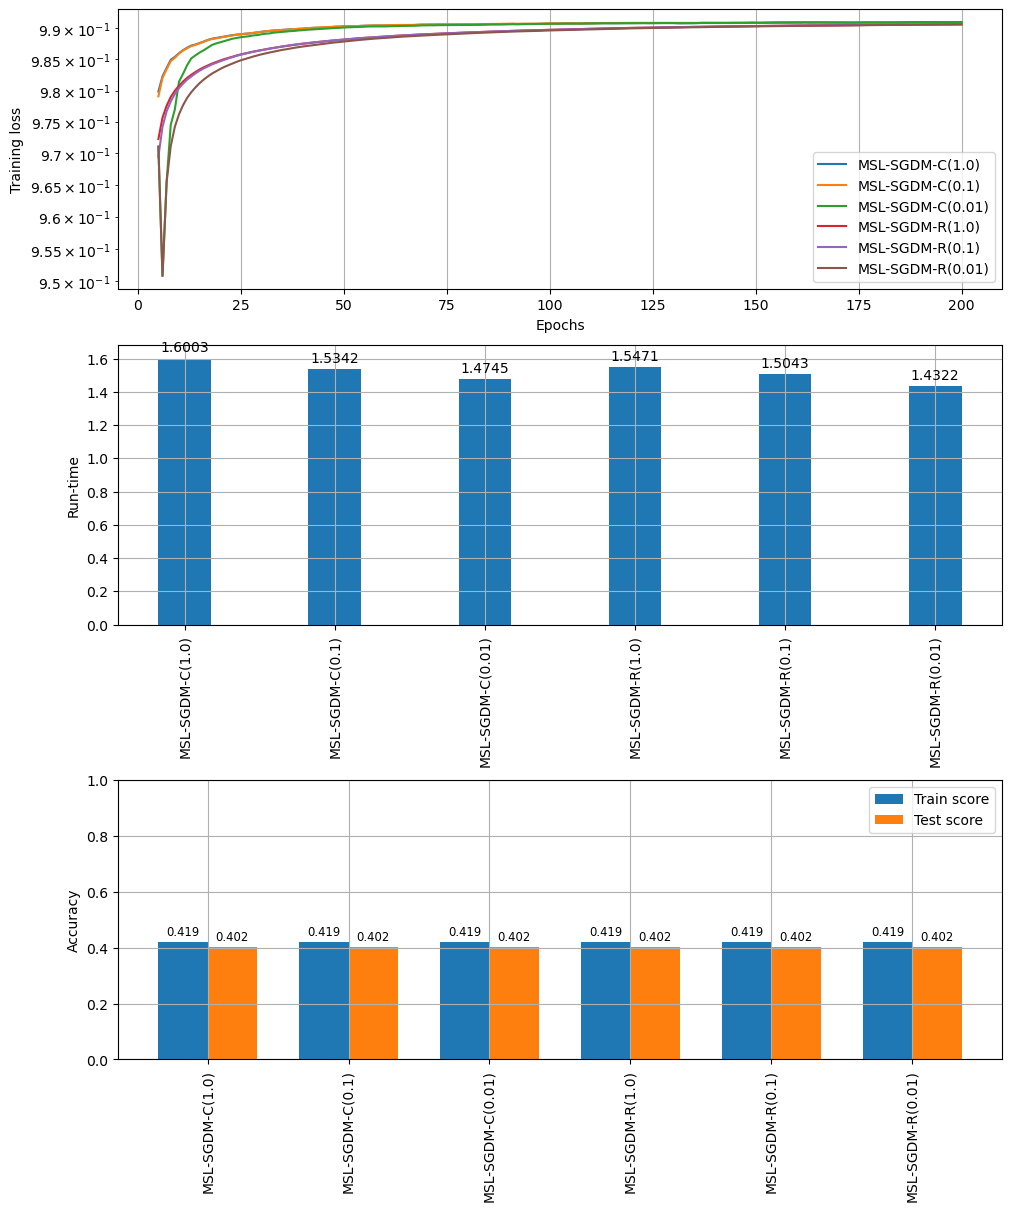

In [12]:
test_plots(modelsCar_data5)

## Summary

In [13]:
pd.concat([modelsCar_data1, modelsCar_data3, modelsCar_data4, modelsCar_data5]).drop(columns={"Solution", "Loss/Epochs", "labels"})

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.00,0.0,0.989224,0.229546,0.361899,200,0.419098,0.402116
1,SGD-Fixed,16,0.10,0.0,0.991026,0.237565,0.360627,200,0.419098,0.402116
2,SGD-Fixed,16,0.05,0.0,0.991160,0.238157,0.344288,200,0.419098,0.402116
3,SGD-Decreasing,16,1.00,0.0,0.991096,0.237864,0.358298,200,0.419098,0.402116
4,SGD-Decreasing,16,0.10,0.0,0.991082,0.237806,0.360099,200,0.419098,0.402116
5,SGD-Decreasing,16,0.01,0.0,0.953600,0.082525,0.363592,200,0.416446,0.402116
0,SGD-Armijo,16,1.00,0.0,0.990903,0.237015,1.492420,200,0.419098,0.402116
1,SGD-Armijo,16,0.10,0.0,0.990904,0.237019,1.423778,200,0.419098,0.402116
2,SGD-Armijo,16,0.01,0.0,0.990898,0.236994,1.367776,200,0.419098,0.402116
0,SGDM,16,1.00,0.9,0.991141,0.238086,0.423307,200,0.419098,0.402116


# Loan eligibility dataset

In [3]:
# load with constant column
X_train_loan = pd.read_csv("datasets/loan_data/loan_X_train.csv").values
y_train_loan = pd.read_csv("datasets/loan_data/loan_y_train.csv").values.reshape(-1)
X_test_loan = pd.read_csv("datasets/loan_data/loan_X_test.csv").values
y_test_loan = pd.read_csv("datasets/loan_data/loan_y_test.csv").values.reshape(-1)

In [4]:
print(f"""
Loan eligibility dataset
X_train = {X_train_loan.shape}, y_train = {y_train_loan.shape}
X_test = {X_test_loan.shape}, y_test = {y_test_loan.shape}""")


Loan eligibility dataset
X_train = (384, 12), y_train = (384,)
X_test = (96, 12), y_test = (96,)


In [5]:
w0Loan = (1.5 + 1.5) * np.random.default_rng(42).random(12) - 1.5

## SGD

### SGD-Fixed

In [20]:
sgdLoan_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

sgdLoan_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

modelsLoan_data1 = optim_data([sgdLoan_fixed1, sgdLoan_fixed2, sgdLoan_fixed3, sgdLoan_decre1, sgdLoan_decre2, sgdLoan_decre3])

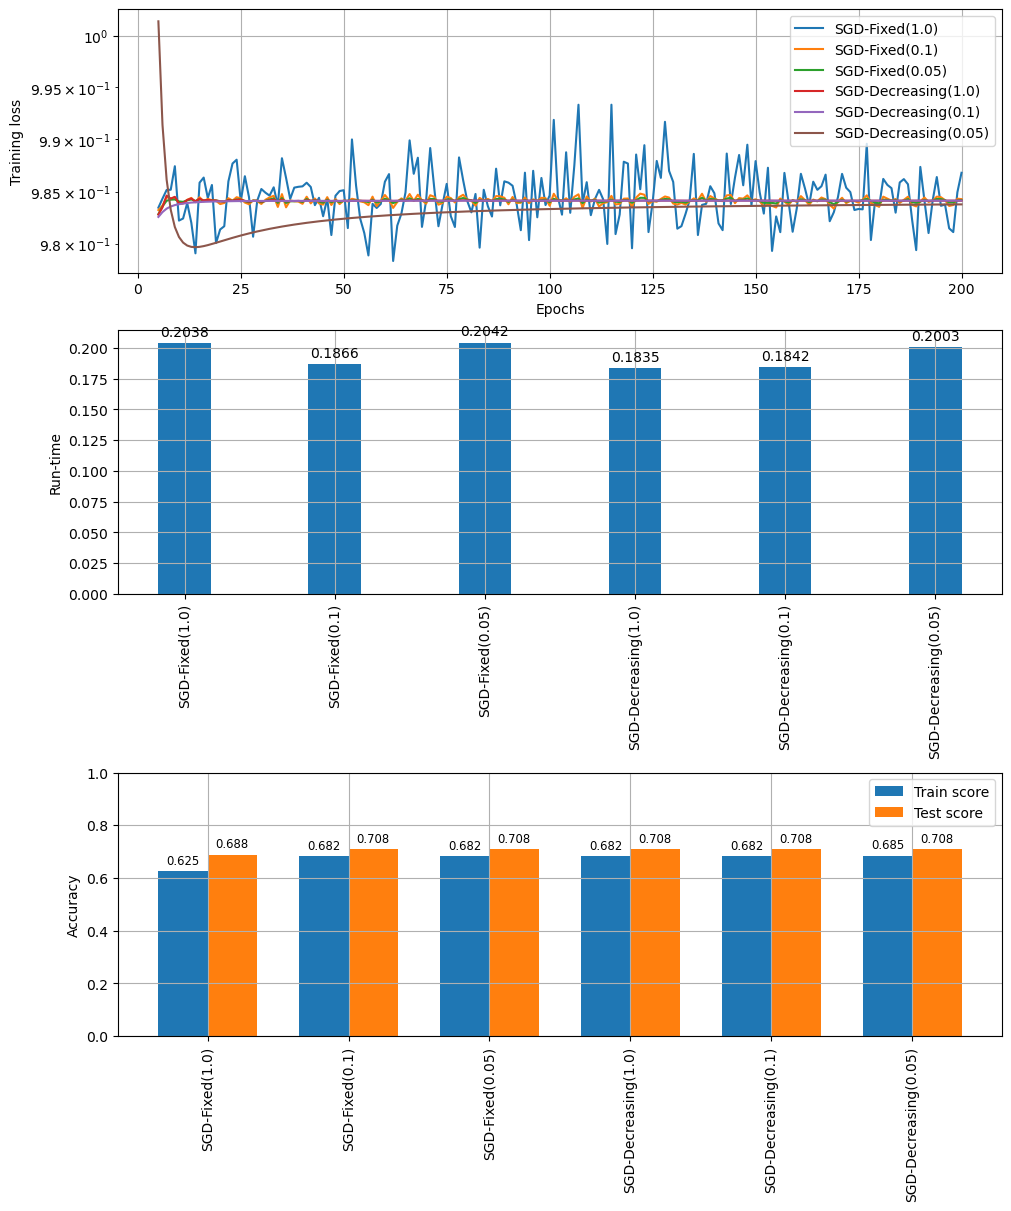

In [21]:
test_plots(modelsLoan_data1)

### SGD-Armijo

In [19]:
sgdLoan_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01)

modelsLoan_data2 = optim_data([sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3])

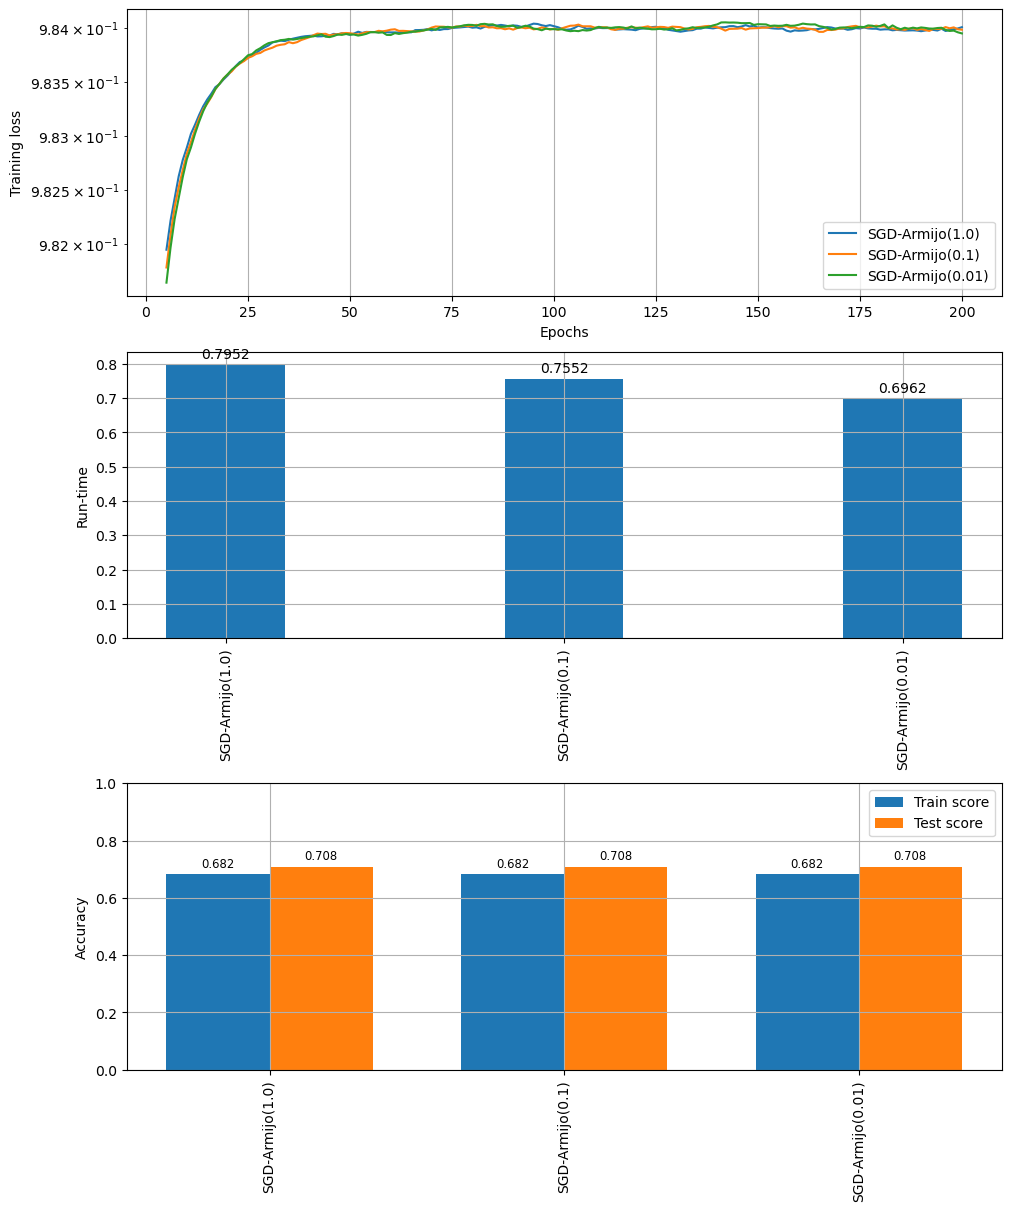

In [22]:
test_plots(modelsLoan_data2)

## SGDM

### SGDM

In [23]:
sgdmLoan_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
sgdmLoan_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
sgdmLoan_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05, momentum=0.9)

modelsLoan_data3 = optim_data([sgdmLoan_1, sgdmLoan_2, sgdmLoan_3])

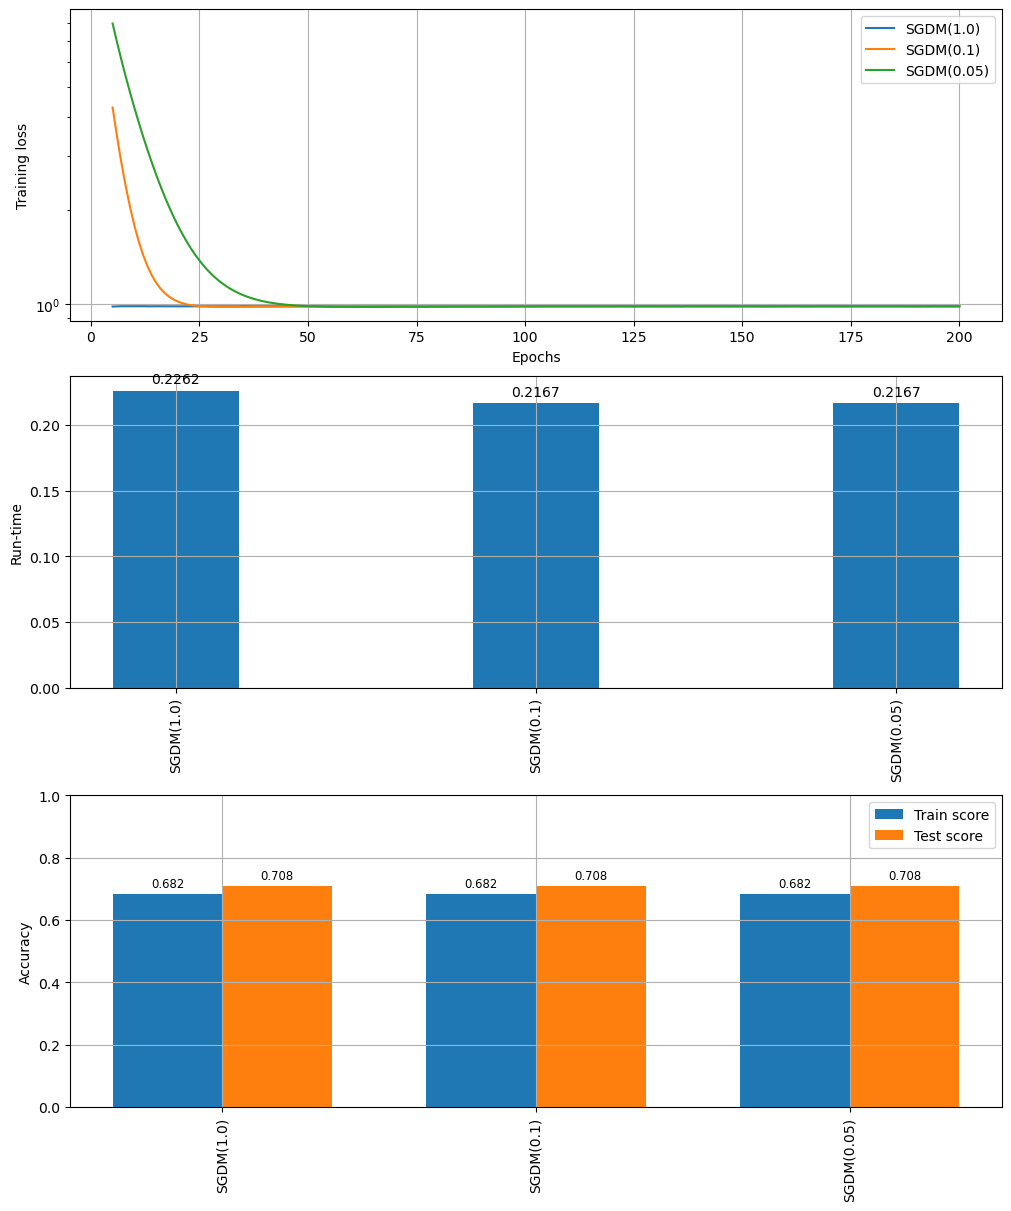

In [24]:
test_plots(modelsLoan_data3)

### MSL-SGDM-C/R

In [25]:
mslcLoan1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslcLoan2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslcLoan3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

mslrLoan1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslrLoan2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslrLoan3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

modelsLoan_data4 = optim_data([mslcLoan1, mslcLoan2, mslcLoan3, mslrLoan1, mslrLoan2, mslrLoan3])

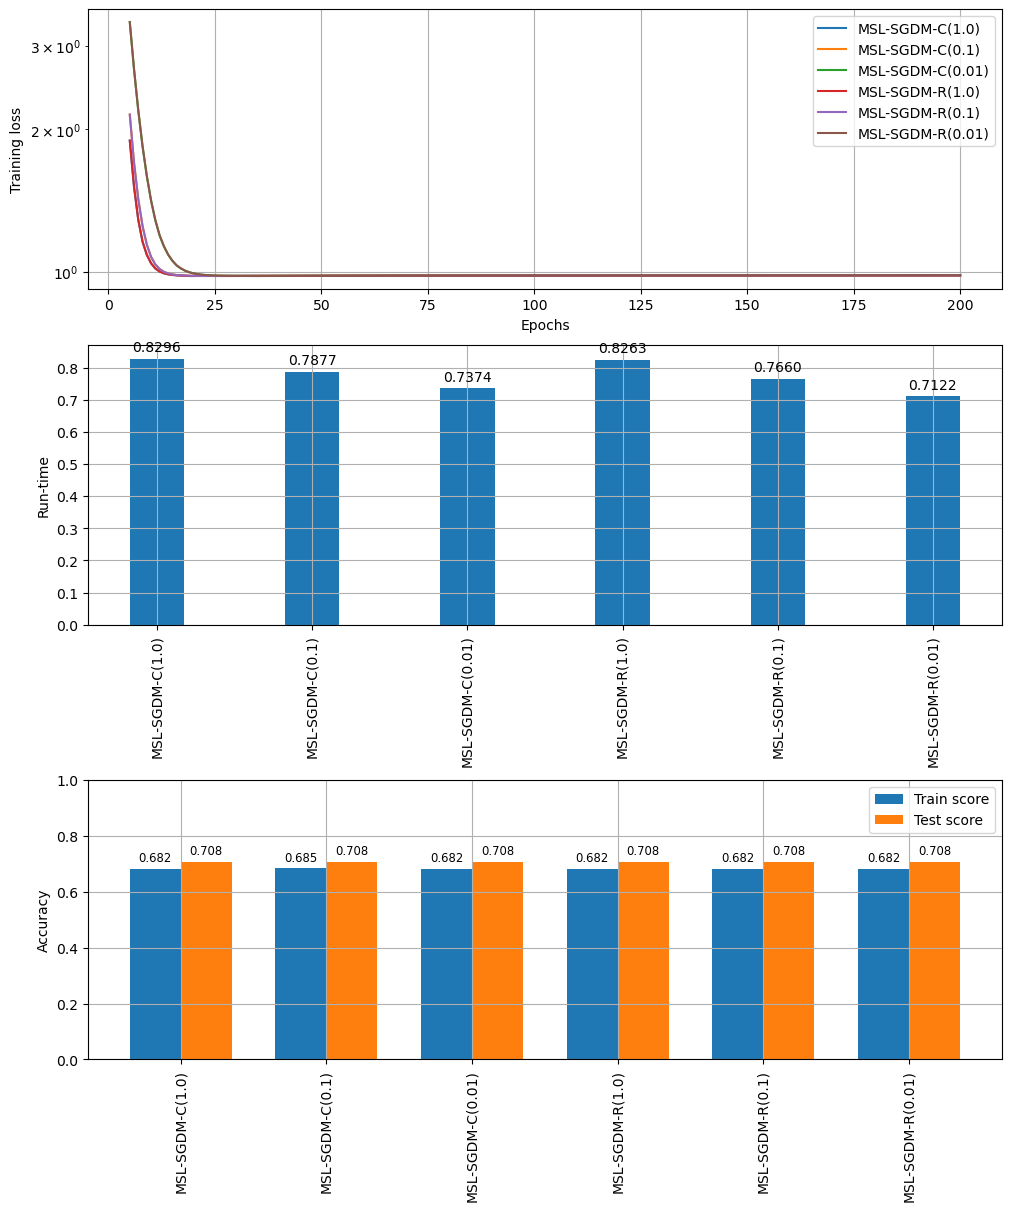

In [26]:
test_plots(modelsLoan_data4)

## Summary

In [27]:
pd.concat([modelsLoan_data1, modelsLoan_data2, modelsLoan_data3, modelsLoan_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.00,0.0,0.986794,0.325904,0.203844,200,0.625000,0.687500
1,SGD-Fixed,16,0.10,0.0,0.984274,0.317291,0.186637,200,0.682292,0.708333
2,SGD-Fixed,16,0.05,0.0,0.984186,0.316995,0.204159,200,0.682292,0.708333
3,SGD-Decreasing,16,1.00,0.0,0.984125,0.316790,0.183476,200,0.682292,0.708333
4,SGD-Decreasing,16,0.10,0.0,0.984125,0.316791,0.184208,200,0.682292,0.708333
5,SGD-Decreasing,16,0.05,0.0,0.983771,0.315633,0.200348,200,0.684896,0.708333
0,SGD-Armijo,16,1.00,0.0,0.984005,0.316392,0.795221,200,0.682292,0.708333
1,SGD-Armijo,16,0.10,0.0,0.983981,0.316315,0.755242,200,0.682292,0.708333
2,SGD-Armijo,16,0.01,0.0,0.983947,0.316201,0.696185,200,0.682292,0.708333
0,SGDM,16,1.00,0.9,0.984179,0.317057,0.226201,200,0.682292,0.708333


# HR score dataset

In [2]:
# load with constant column
X_train_hr = pd.read_csv("datasets/hr_score/hr_X_train.csv").values
y_train_hr = pd.read_csv("datasets/hr_score/hr_y_train.csv").values.reshape(-1)
X_test_hr = pd.read_csv("datasets/hr_score/hr_X_test.csv").values
y_test_hr = pd.read_csv("datasets/hr_score/hr_y_test.csv").values.reshape(-1)

In [5]:
print(f"""
HR score dataset
X_train = {X_train_hr.shape}, y_train = {y_train_hr.shape}
X_test = {X_test_hr.shape}, y_test = {y_test_hr.shape}""")


HR score dataset
X_train = (240, 10), y_train = (240,)
X_test = (60, 10), y_test = (60,)


In [6]:
w0HR = (2 + 2) * np.random.default_rng(42).random(10) - 2

## SGD

### SGD-Fixed/Decreasing

In [7]:
sgdHR_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

sgdHR_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

modelsHR_data1 = optim_data([sgdHR_fixed1, sgdHR_fixed2, sgdHR_fixed3, sgdHR_decre1, sgdHR_decre2, sgdHR_decre3])

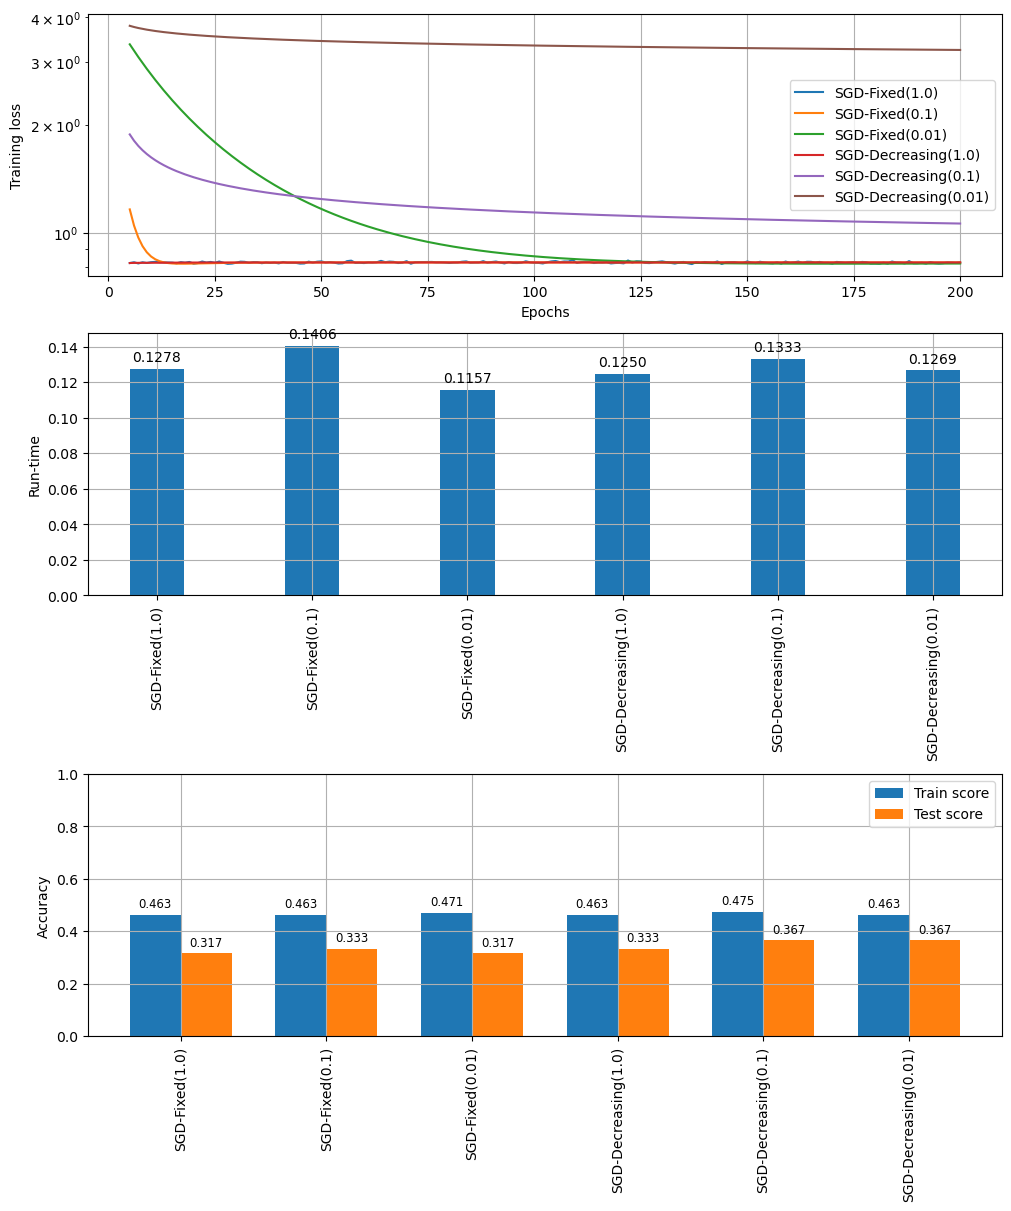

In [8]:
test_plots(modelsHR_data1)

### SGD-Armijo

In [10]:
sgdHR_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

modelsHR_data2 = optim_data([sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3])

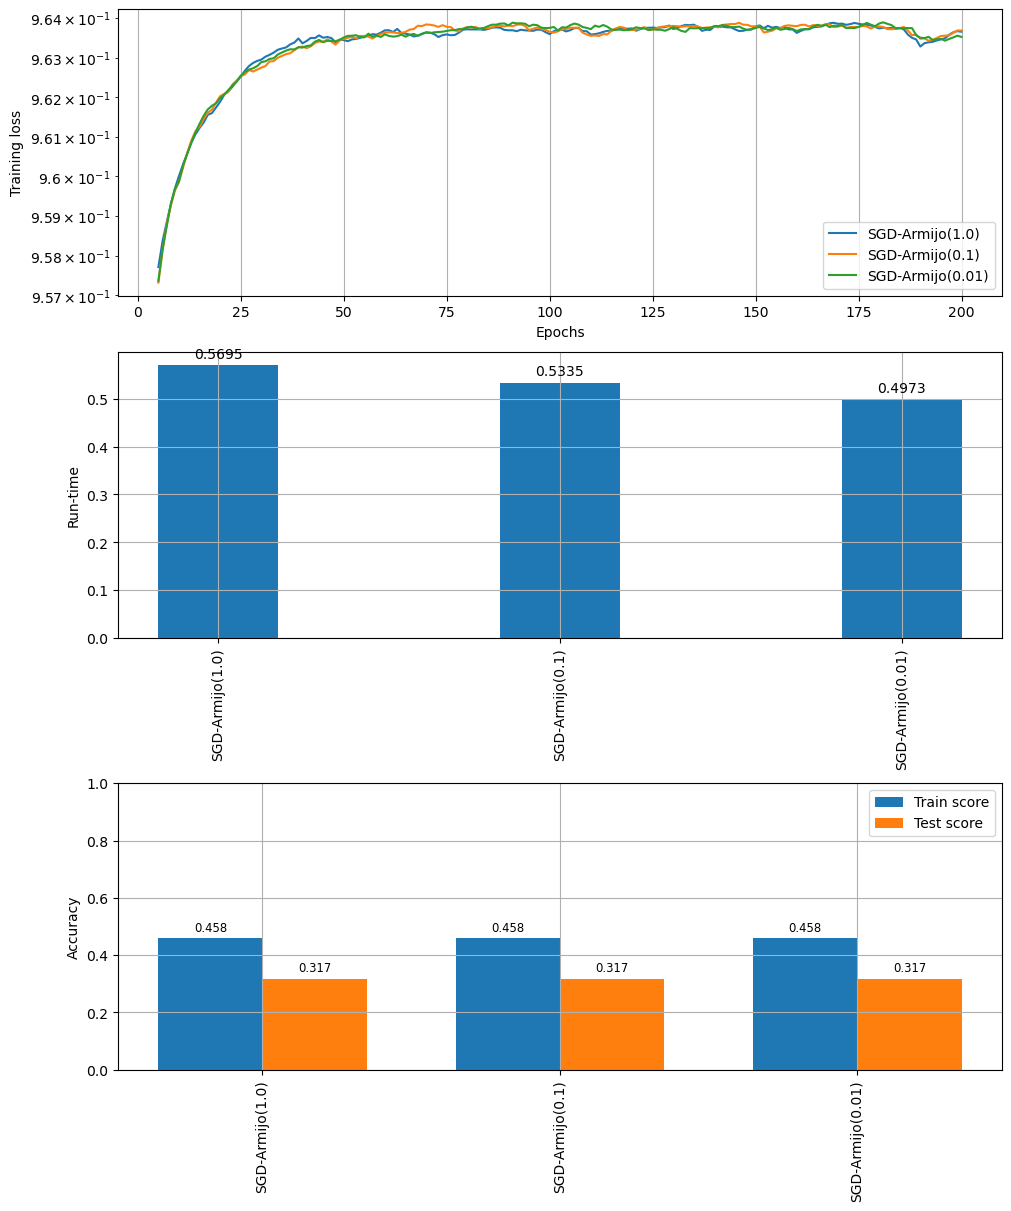

In [11]:
test_plots(modelsHR_data2)

## SGDM

In [12]:
sgdmHR1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
sgdmHR2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
sgdmHR3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

modelsHR_data3 = optim_data([sgdmHR1, sgdmHR2, sgdmHR3])

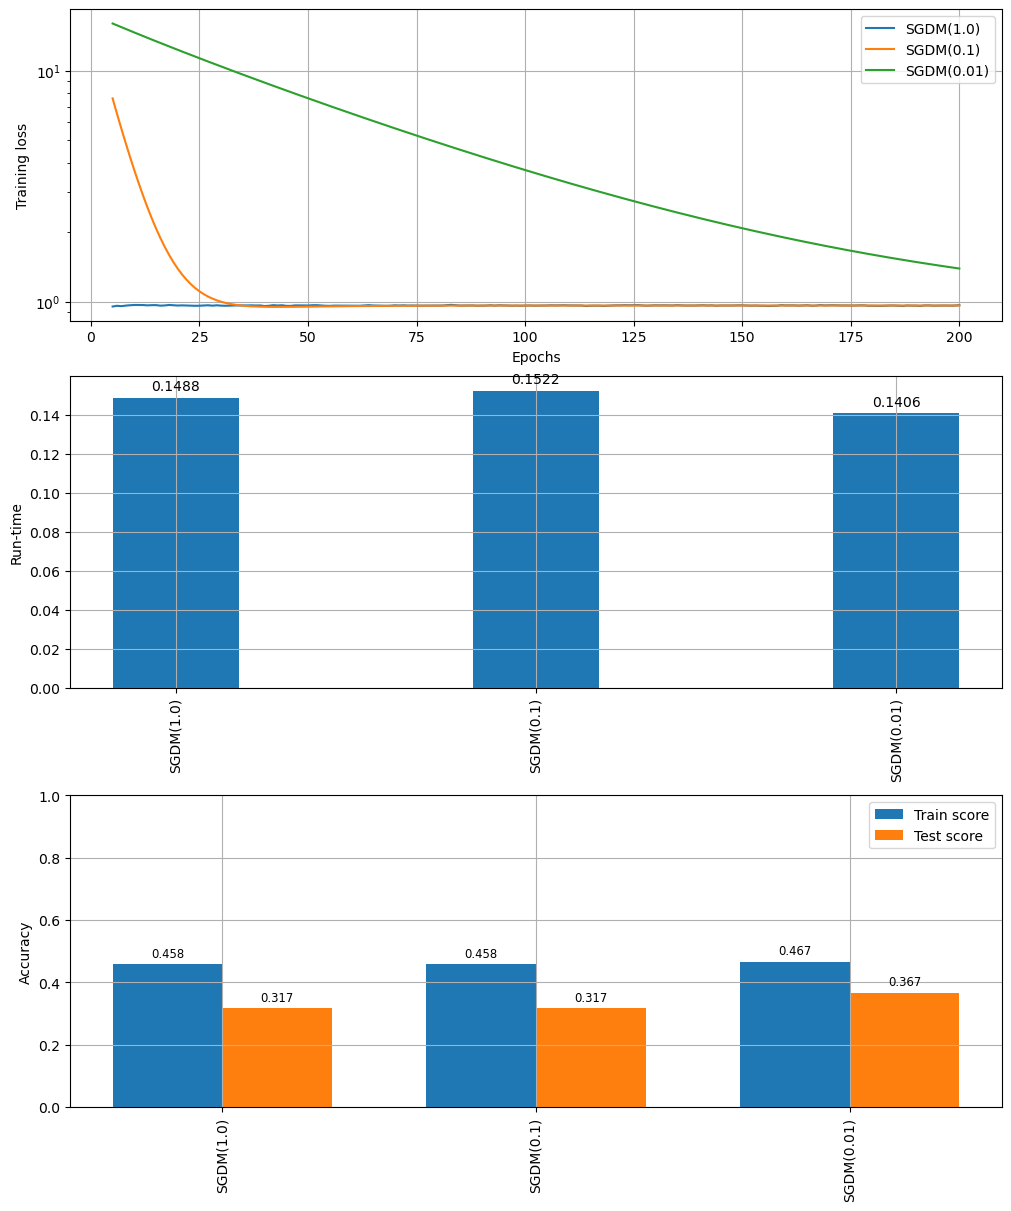

In [13]:
test_plots(modelsHR_data3)

### MSL-SGDM-C/R

In [14]:
mslcHR1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslcHR2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslcHR3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

mslrHR1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslrHR2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslrHR3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

modelsHR_data4 = optim_data([mslcHR1, mslcHR2, mslcHR3, mslrHR1, mslrHR2, mslrHR3])

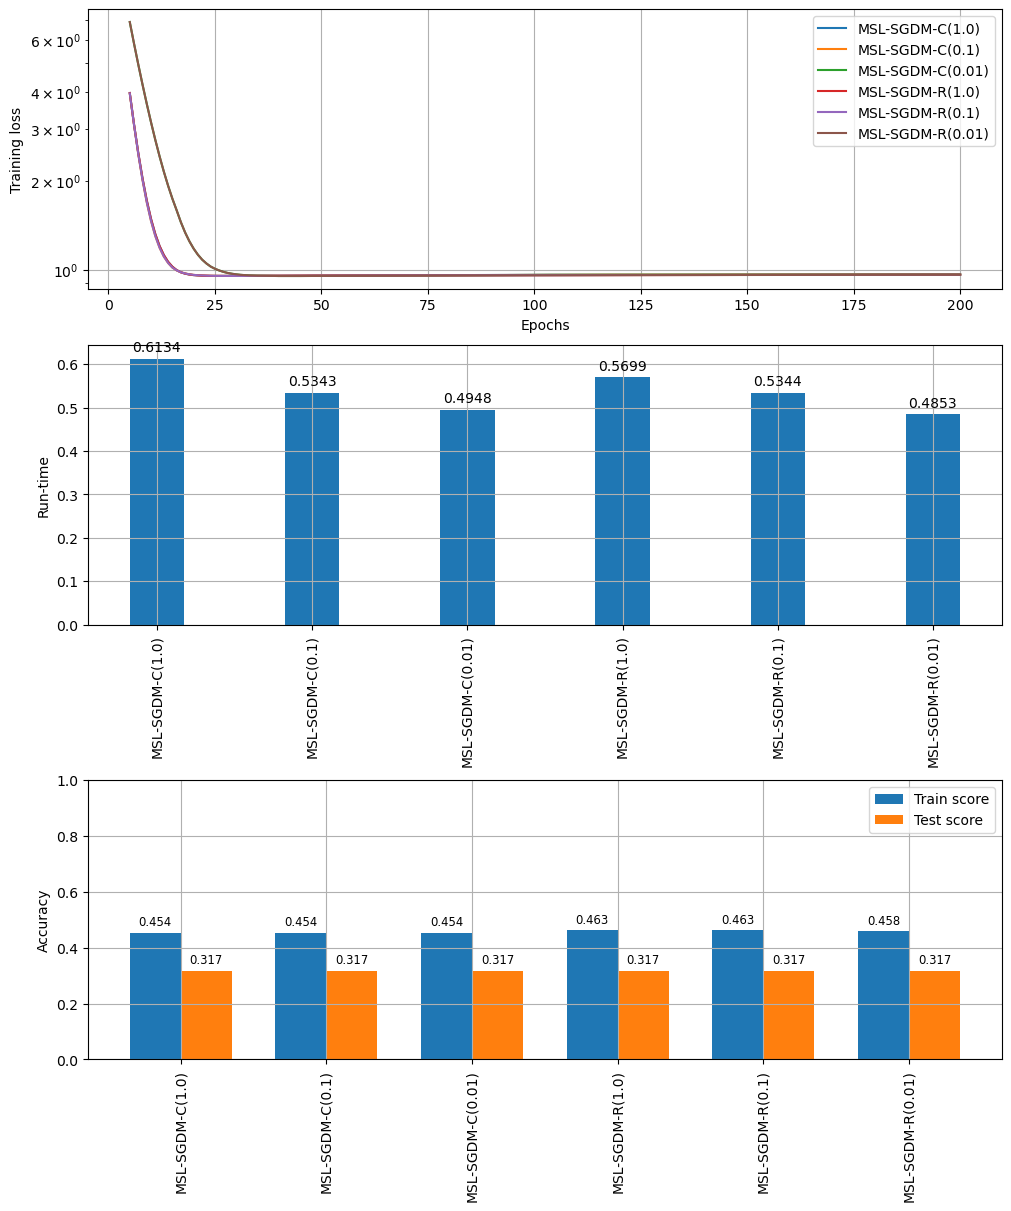

In [15]:
test_plots(modelsHR_data4)

## Summary

In [16]:
pd.concat([modelsHR_data1, modelsHR_data2, modelsHR_data3, modelsHR_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.00,0.0,0.825399,0.318026,0.127771,200,0.462500,0.316667
1,SGD-Fixed,16,0.10,0.0,0.825121,0.316516,0.140579,200,0.462500,0.333333
2,SGD-Fixed,16,0.01,0.0,0.819480,0.305799,0.115701,200,0.470833,0.316667
3,SGD-Decreasing,16,1.00,0.0,0.825272,0.316845,0.124959,200,0.462500,0.333333
4,SGD-Decreasing,16,0.10,0.0,1.060016,0.348094,0.133337,200,0.475000,0.366667
5,SGD-Decreasing,16,0.01,0.0,3.238566,0.735635,0.126931,200,0.462500,0.366667
0,SGD-Armijo,16,1.00,0.0,0.963653,0.466465,0.569457,200,0.458333,0.316667
1,SGD-Armijo,16,0.10,0.0,0.963683,0.466530,0.533494,200,0.458333,0.316667
2,SGD-Armijo,16,0.01,0.0,0.963519,0.466007,0.497300,200,0.458333,0.316667
0,SGDM,16,1.00,0.9,0.968139,0.481250,0.148799,200,0.458333,0.316667


# Bank churn dataset

In [2]:
# load with constant column
X_train_bank = pd.read_csv("datasets/bank_churn/bank_X_train.csv").values
y_train_bank = pd.read_csv("datasets/bank_churn/bank_y_train.csv").values.reshape(-1)
X_test_bank = pd.read_csv("datasets/bank_churn/bank_X_test.csv").values
y_test_bank = pd.read_csv("datasets/bank_churn/bank_y_test.csv").values.reshape(-1)

In [3]:
print(f"""
Bank churn dataset
X_train = {X_train_bank.shape}
X_test = {X_test_bank.shape}""")


Bank churn dataset
X_train = (139052, 18)
X_test = (34763, 18)


In [51]:
w0 = (1.5 + 1.5) * np.random.default_rng(42).random(18) - 1.5

## SGD

### SGD-Fixed

In [53]:
sgd_fixed2_1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgd_fixed2_2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)
sgd_fixed2_3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.05)

models1_data2 = optim_data([sgd_fixed2_1, sgd_fixed2_2, sgd_fixed2_3])

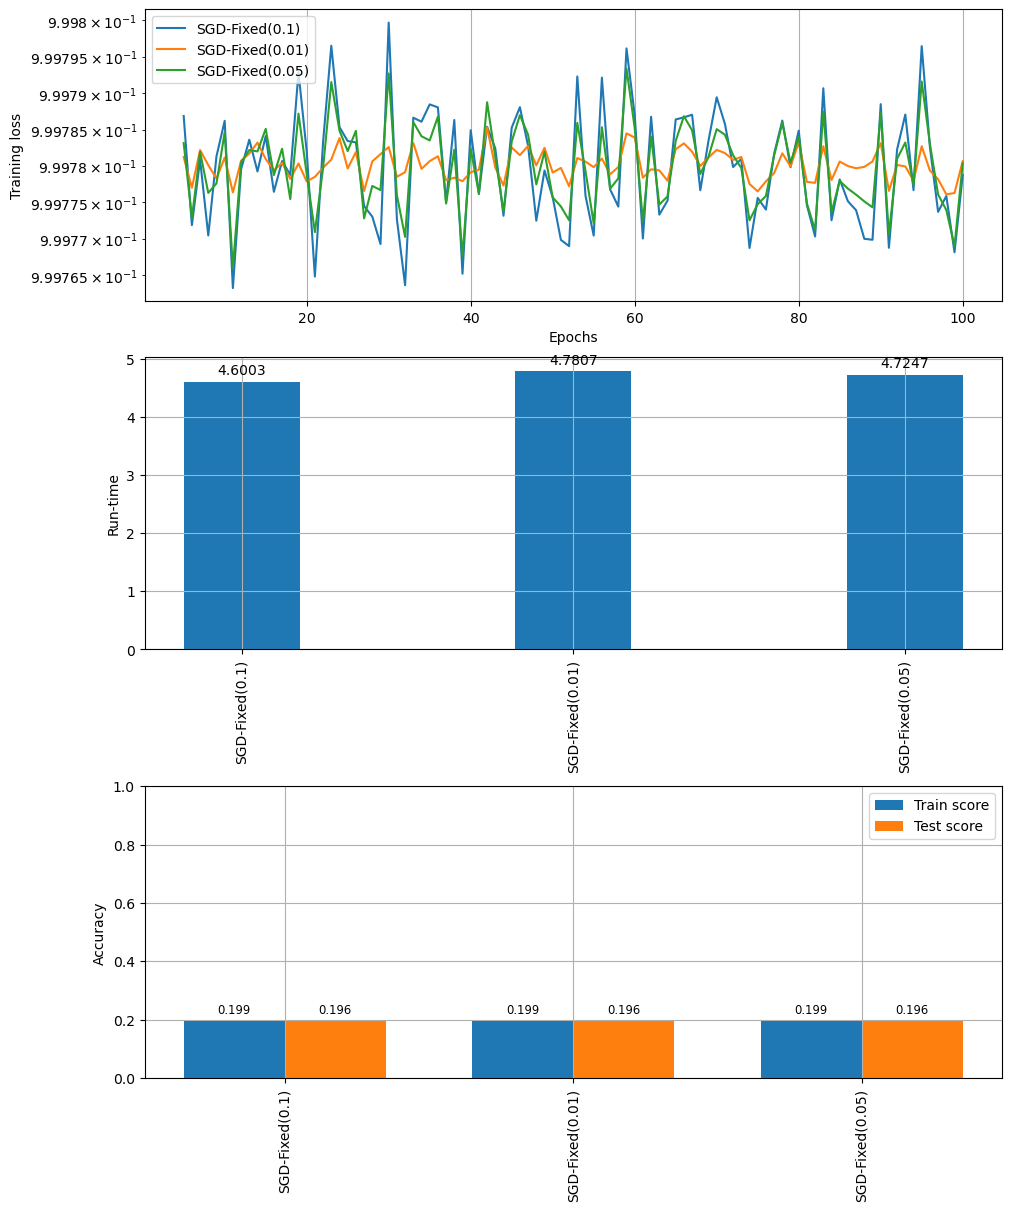

In [54]:
test_plots(models1_data2)

### SGD-Decreasing

In [55]:
sgd_decre2_1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgd_decre2_2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgd_decre2_3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)

models2_data2 = optim_data([sgd_decre2_1, sgd_decre2_2, sgd_decre2_3])

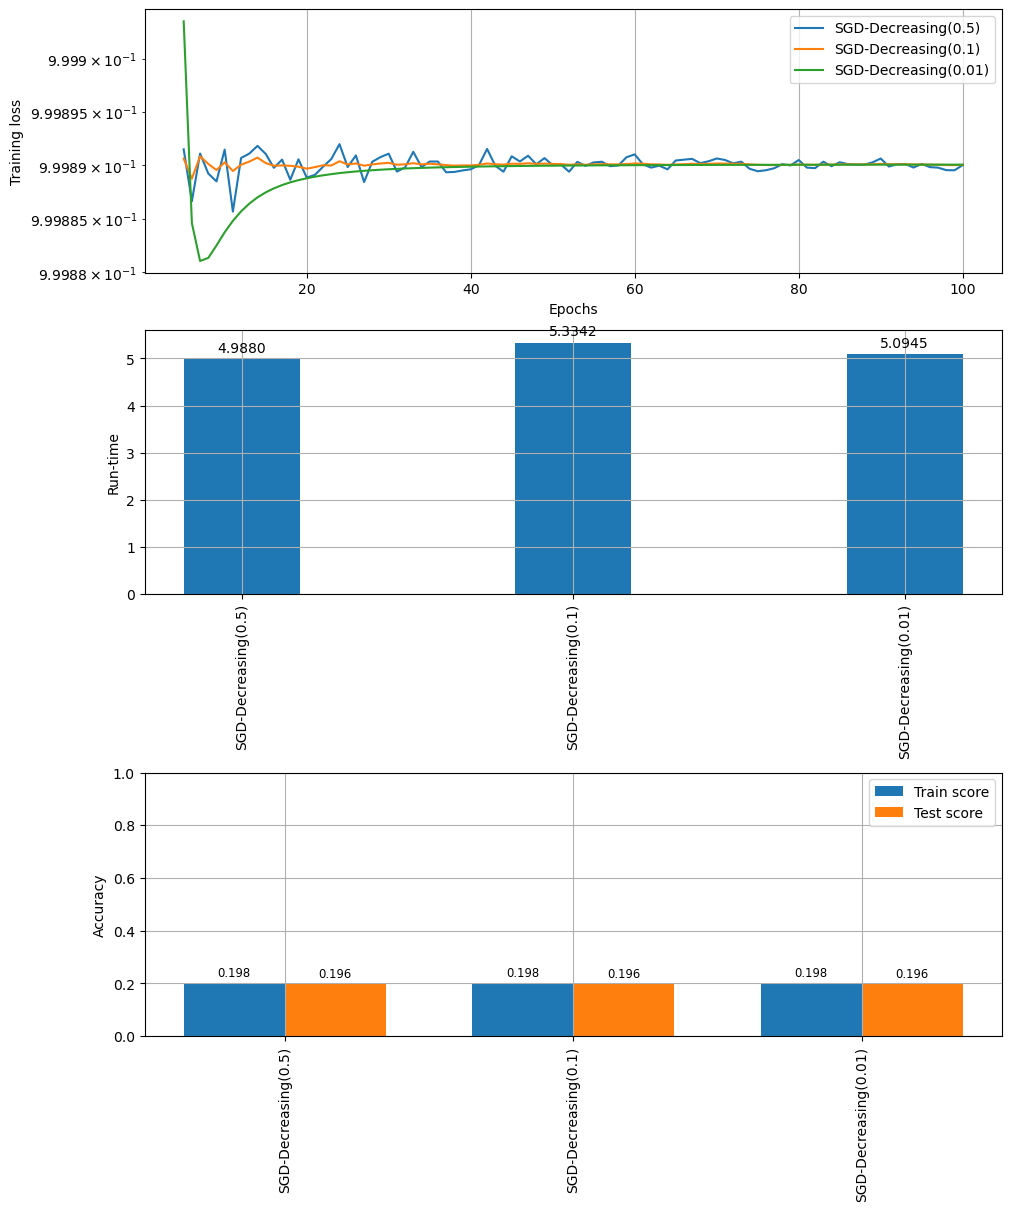

In [56]:
test_plots(models2_data2)

### SGD-Armijo

In [52]:
sgd_armijo2_1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
#sgd_armijo2_2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)
#sgd_armijo2_3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.001)
# regolarizzazione massima, altrimenti ci impiega troppo per l'esecuzione

models3_data2 = optim_data([sgd_armijo2_1, sgd_armijo2_2, sgd_armijo2_3])

KeyboardInterrupt: 

## SGDM

### SGDM

# Breast cancer dataset

In [10]:
# load with constant column
X_train_breast = pd.read_csv("datasets/breast_cancer/breast_X_train.csv").values
y_train_breast = pd.read_csv("datasets/breast_cancer/breast_y_train.csv").values.reshape(-1)
X_test_breast = pd.read_csv("datasets/breast_cancer/breast_X_test.csv").values
y_test_breast = pd.read_csv("datasets/breast_cancer/breast_y_test.csv").values.reshape(-1)

In [11]:
print(f"""
Breast cancer dataset
X_train = {X_train_breast.shape}
X_test = {X_test_breast.shape}""")


Bank churn dataset
X_train = (455, 31)
X_test = (114, 31)


In [12]:
w0 = (1.5 + 1.5) * np.random.default_rng(42).random(31) - 1.5

In [13]:
sgd_fixed3_1 = LogisticRegression(solver="SGD-Fixed", C=0.2, minibatch=8).fit(w0, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgd_fixed3_2 = LogisticRegression(solver="SGD-Fixed", C=0.2, minibatch=8).fit(w0, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)
sgd_fixed3_3 = LogisticRegression(solver="SGD-Fixed", C=0.2, minibatch=8).fit(w0, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05)

models1_data3 = optim_data([sgd_fixed3_1, sgd_fixed3_2, sgd_fixed3_3])

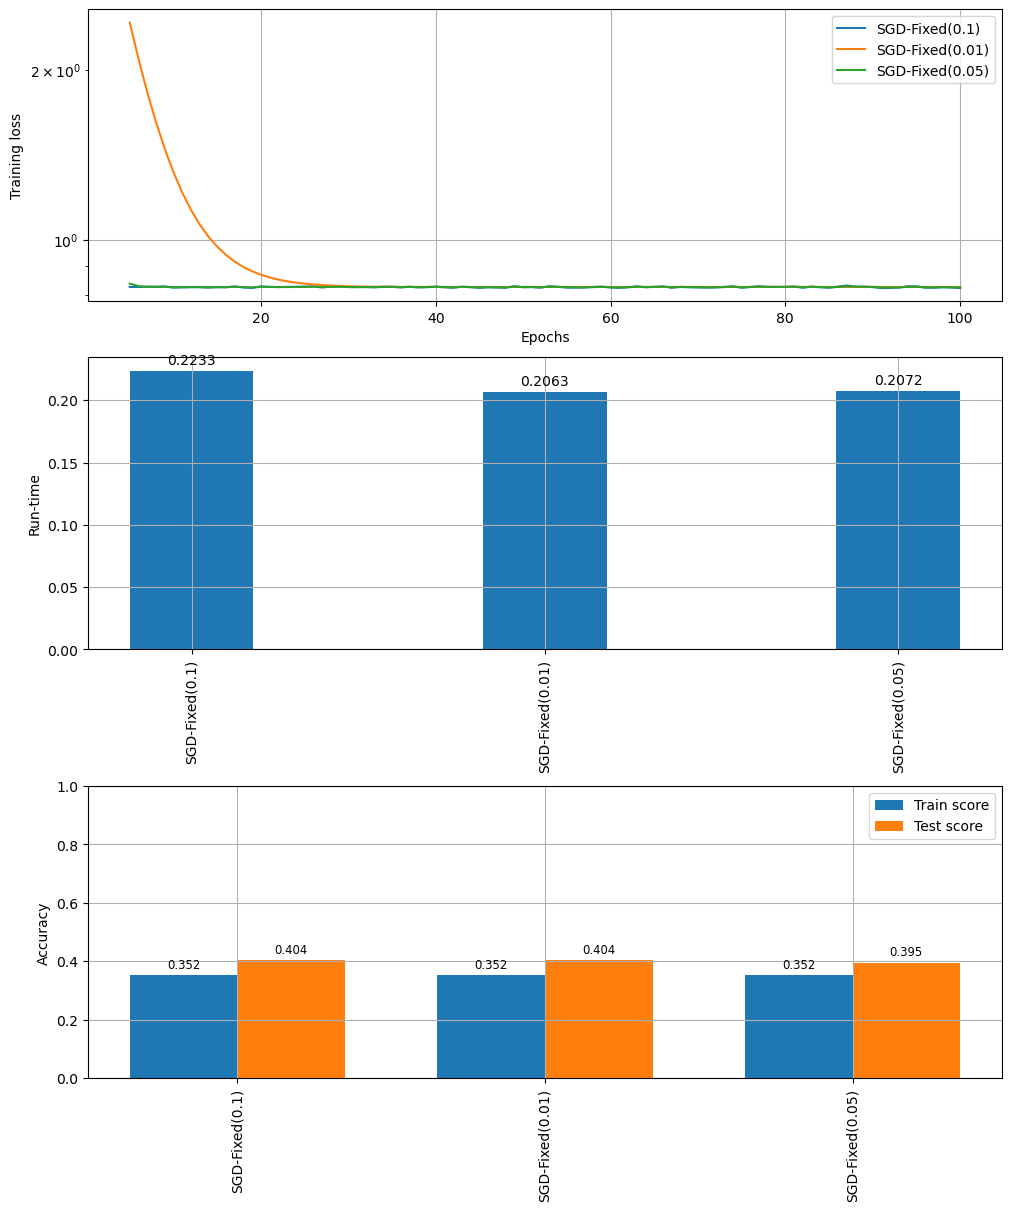

In [14]:
test_plots(models1_data3)

In [15]:
sgd_decre3_1 = LogisticRegression(solver="SGD-Decreasing", C=0.2, minibatch=8).fit(w0, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgd_decre3_2 = LogisticRegression(solver="SGD-Decreasing", C=0.2, minibatch=8).fit(w0, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05)
sgd_decre3_3 = LogisticRegression(solver="SGD-Decreasing", C=0.2, minibatch=8).fit(w0, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

models2_data3 = optim_data([sgd_decre3_1, sgd_decre3_2, sgd_decre3_3])

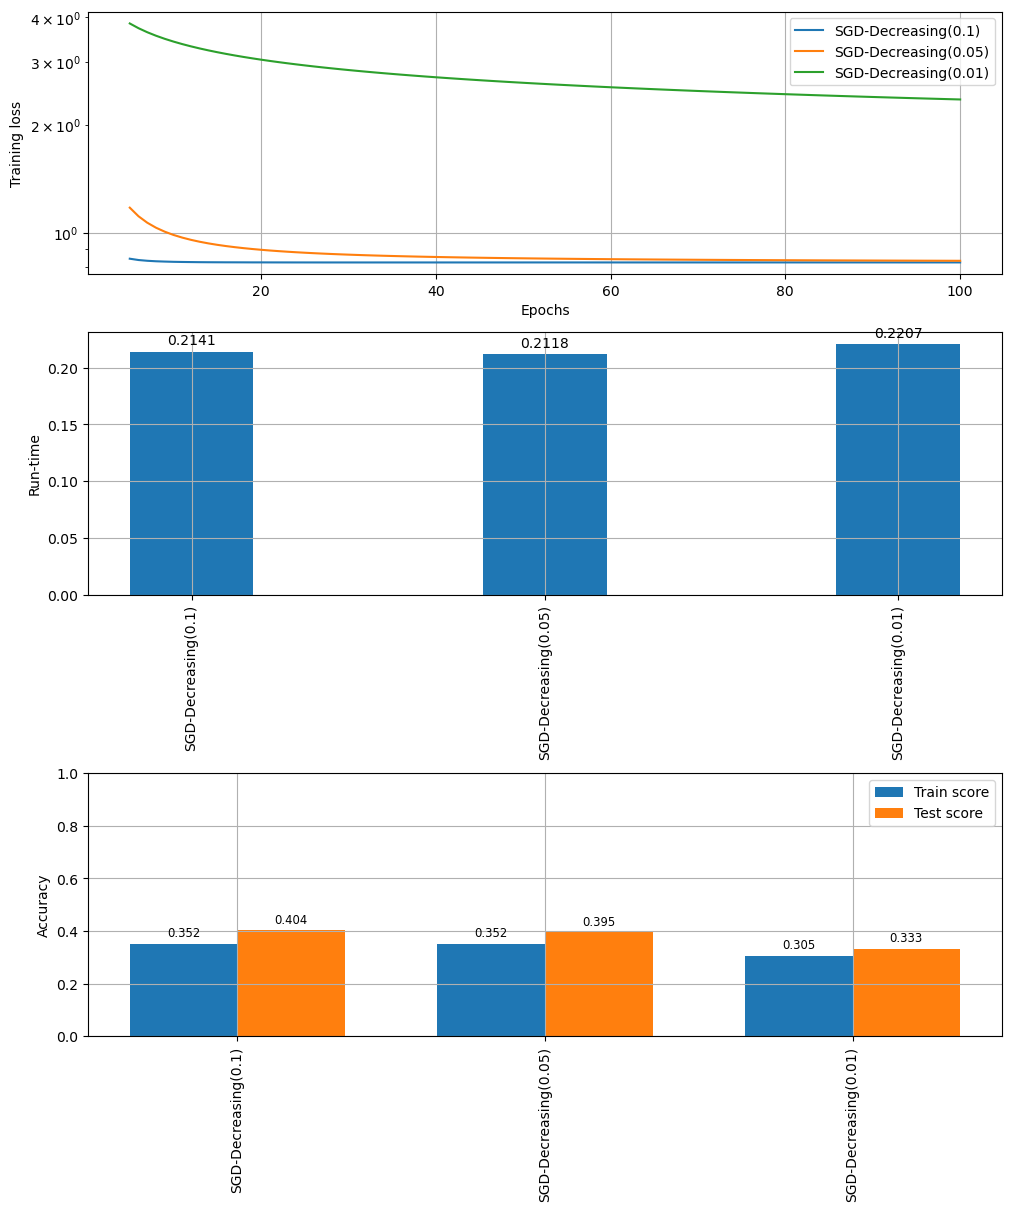

In [16]:
test_plots(models2_data3)

In [19]:
sgdm3_1 = LogisticRegression(solver="SGDM", C=0.2, minibatch=8).fit(w0, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
sgdm3_2 = LogisticRegression(solver="SGDM", C=0.2, minibatch=8).fit(w0, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5, momentum=0.9)
sgdm3_3 = LogisticRegression(solver="SGDM", C=0.2, minibatch=8).fit(w0, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05, momentum=0.9)

models3_data3 = optim_data([sgdm3_1, sgdm3_2, sgdm3_3])

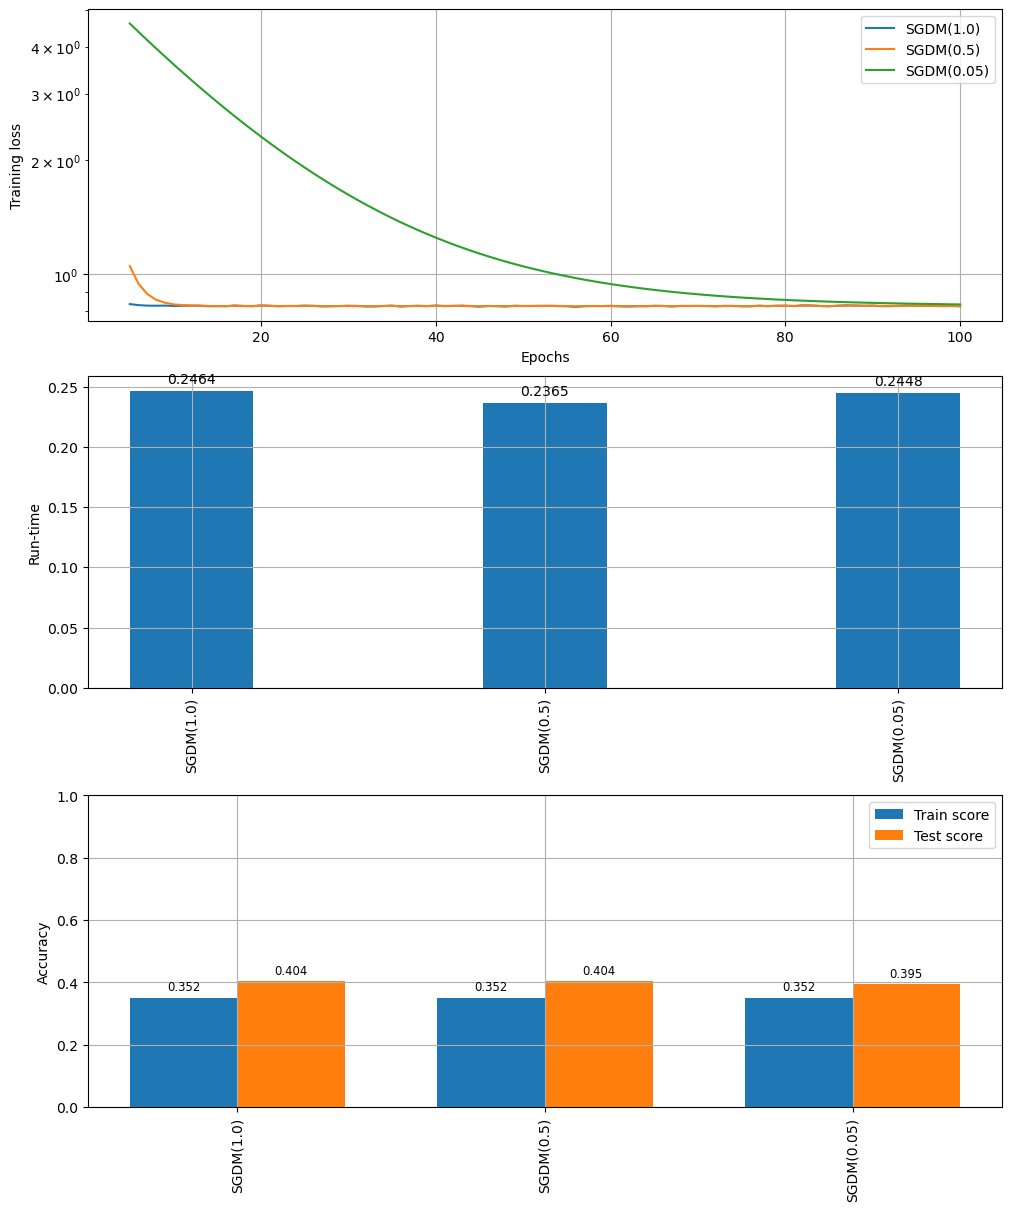

In [20]:
test_plots(models3_data3)